<a href="https://colab.research.google.com/github/sagacemente/user-simulation-regression/blob/main/def_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import modules

In [ ]:
import numpy as np
import random
from scipy.stats import truncnorm
from scipy.special import softmax
from collections import Counter
import os
import seaborn as sns
import pandas as pd
import torch
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Crea utenti e salva file

Le caratteristiche dell'utente per determinare se un immagine è vera o falsa sono: 
*   Pensiero Critico: float [0,1]
*   Conscenza del topic: float [0,1]. 
*   Virality preference: float [0,1]. Scale the image virality (which is an int 
)
*   Topic Preferences:  array with n-dimension n = number of topics    
*   Fakeness: average the  



In [ ]:
def create_users(num_users, num_topic):
  topic_pref     = np.random.uniform(low =-1,   high=1,   size=(num_users, num_topic))
  fakeness_pref  = np.random.uniform(low = 0,   high=1,   size=(num_users))
  virality_pref  = np.random.uniform(low =-1,   high=1,   size=(num_users))
  cred_pref      = np.random.uniform(low = 0,   high=1,   size=(num_users))
  ricon_manip    = np.random.uniform(low = 0.8, high=1, size=(num_users))
  crit_think     = np.random.uniform(low = 0.8, high=1, size=(num_users))
  kt             = np.random.uniform(low = 0.8, high=1, size=(num_users, num_topic))
  #embedd        = np.random.uniform(low = 0, high=1, size=(num_users, 1000))
  #dict_user_pref= {user: {'embedding':embedd[user, :],'topic':topic_pref[user, :], 'fake':fakeness_pref[user], 'virality':virality_pref[user], 'credibility_user':cred_pref[user], 'rm': ricon_manip[user], 'crit_think': crit_think[user], 'kt': kt[user]} for user in range(num_users)}
  dict_user_pref = {user: {'topic':topic_pref[user, :], 'fake':fakeness_pref[user], 'virality':virality_pref[user], 'credibility_user':cred_pref[user], 'rm': ricon_manip[user], 'crit_think': crit_think[user], 'kt': kt[user]} for user in range(num_users)}
  return dict_user_pref#, embedd

In [ ]:
#salvare file utente
dict_user = create_users(1000, 4)

In [ ]:
print(dict_user[0]['crit_think'], dict_user[1]['rm'])

0.9980251430164874 0.37555584994058644


In [ ]:
#torch.save(dictuser, '/content/drive/MyDrive/Simulazione Marco Siino/test_user_features.pt')
#torch.save(dictuser, '/content/drive/MyDrive/Simulazione Marco Siino/test_user_features.pt')
dict_user = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/test_user_features.pt')

In [ ]:
dict_user = create_users(1000, 4)

## Family specifc user

In [ ]:
def create_users_with_param(num_users, num_topic, fmin, fmax, virmin, virmax, manipmin, manipmax, ctmin, ctmax, ktmin, ktmax):
  topic_pref     = np.random.uniform(low =-1,        high=1,   size=(num_users, num_topic))
  fakeness_pref  = np.random.uniform(low = fmin,     high=fmax,   size=(num_users))
  virality_pref  = np.random.uniform(low =virmin,    high=virmax,   size=(num_users))
  cred_pref      = np.random.uniform(low = 0,        high= 1,   size=(num_users))
  ricon_manip    = np.random.uniform(low = manipmin, high=manipmax, size=(num_users))
  crit_think     = np.random.uniform(low = ctmin,    high=ctmax, size=(num_users))
  kt             = np.random.uniform(low = ktmin,    high=ktmax, size=(num_users, num_topic))
  #embedd        = np.random.uniform(low = 0, high=1, size=(num_users, 1000))
  #dict_user_pref= {user: {'embedding':embedd[user, :],'topic':topic_pref[user, :], 'fake':fakeness_pref[user], 'virality':virality_pref[user], 'credibility_user':cred_pref[user], 'rm': ricon_manip[user], 'crit_think': crit_think[user], 'kt': kt[user]} for user in range(num_users)}
  dict_user_pref = {user: {'topic':topic_pref[user, :], 'fake':fakeness_pref[user], 'virality':virality_pref[user], 'credibility_user':cred_pref[user], 'rm': ricon_manip[user], 'crit_think': crit_think[user], 'kt': kt[user]} for user in range(num_users)}
  return dict_user_pref#, embedd

In [ ]:
fam_low = create_users_with_param(num_users=500, num_topic=4, fmin=0.0, fmax=0.33, virmin=-1, virmax=1, manipmin=0.0, manipmax=0.33, ctmin=0.0, ctmax=0.33, ktmin=0.0, ktmax=0.33)
fam_med = create_users_with_param(num_users=500, num_topic=4, fmin=0.33, fmax=0.66, virmin=-1, virmax=1, manipmin=0.33, manipmax=0.66, ctmin=0.33, ctmax=0.66, ktmin=0.33, ktmax=0.66)
fam_hig = create_users_with_param(num_users=500, num_topic=4, fmin=0.66, fmax=1, virmin=-1, virmax=1    , manipmin=0.66, manipmax=1, ctmin=0.66, ctmax=1, ktmin=0.66, ktmax=1)


fam_lowCT_high_FK_low_rm = create_users_with_param(num_users=500, num_topic=4, fmin=0.66, fmax=1,    virmin=-1, virmax=1, manipmin=0.0, manipmax=0.33, ctmin=0.0,  ctmax=0.33, ktmin=0, ktmax=1)
fam_MED_CT_medFK_MED_RM  = create_users_with_param(num_users=500, num_topic=4, fmin=0.33, fmax=0.66, virmin=-1, virmax=1, manipmin=0.33,manipmax=0.66, ctmin=0.33, ctmax=0.66, ktmin=0, ktmax=1)
fam_higCT_lowFK_high_rm  = create_users_with_param(num_users=500, num_topic=4, fmin=0.0,  fmax=0.33, virmin=-1, virmax=1, manipmin=0.66, manipmax=1,   ctmin=0.66, ctmax= 1,   ktmin=0, ktmax=1)



# Carica dati immagini reali

In [ ]:
df_imgs =  pd.read_csv('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/FINAL_IMAGES_NAMES_FEATURES_URL.csv', index_col=0)
dict_tf = {"T" : 0, "F" : 1}
dict_auth = {"T" : 0, "F" : 1}
dict_topic = {"space" : 0, "politics" : 1, 'naturaldisaster': 2,'commons':3}
dict_cred = {'HC':1, 'LC':0, 'MC':0.5}
dict_manip = {'HM':1, 'LM':0, 'MM':0.5}
df_imgs.replace({"authenticity": dict_auth,"t_f": dict_tf, 'topic': dict_topic, 'cred': dict_cred, 'manip': dict_manip},inplace=True)

df_imgs.head(4)

,folder,topic,t_f,cred,manip,virality,authenticity,url
professional_ph_T_HC_HM.PNG,space_T_HC_HM,0,0,1.0,1.0,5.15,0,https://www.freepik.com/premium-photo/tourists...
30SCI-BLACKHOLES1-videoSixteenByNineJumbo1600-v3.jpg,space_T_HC_HM,0,0,1.0,1.0,4.16,0,https://www.mirror.co.uk/science/scientists-co...
10cosmicwall-mw-superJumbo-v3.jpg,space_T_HC_HM,0,0,1.0,1.0,2.70,0,https://www.jpl.nasa.gov/images/pia03654-a-cau...
22wordplay-milky-way-facebookJumbo.jpg,space_T_HC_HM,0,0,1.0,1.0,5.76,0,https://www.gettyimages.it/immagine/car-milky-way


In [ ]:
df_imgs['cred'].corr(df_imgs['manip'])

-0.3478266474667571

## Images embedding

In [ ]:
imgs_emb = torch.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/embedding_tensors.pt', map_location=torch.device('cpu'))

In [ ]:
len([*imgs_emb]) == len(df_imgs)

True

# Creare griglie su immagini reali 

In [ ]:
def create_balanced_grids(df_res, num_grid,balance:list = ['topic', 'fake']):
  '''Create grids balanced by topic and fake/true
  Input: num_girds, pd.DataFrame with in each row an image. Each column is a feature. Mandatory columns are topic and the labelcolumn
  Output: return a dictionary where each key is the index of the grid and the value is a list with the name of the images '''
  
  dict_grid = dict()
  df_copy = df_res.copy()
  groups = df_copy.groupby(balance)
  classes={}
  classes_count={}
  #crea per ogni gruppo le classi in base a cred e manip per potere usare tutte quelle meno frequenti
  for group in groups: 
    temp=group[1].groupby(['cred','manip'])
    classes[group[0]]={}
    classes_count[group[0]]={}
    for dclass in temp:
      classes[group[0]][dclass[0]]=[(dclass[1]["folder"][i]+os.path.sep +i) for i in dclass[1].index.tolist()]
      classes_count[group[0]][dclass[0]]=[0,len(classes[group[0]][dclass[0]])]
      
  
  listofimages=[]
  for grid in range(num_grid):
    # print("grid:",grid)  
    dict_grid[grid] = []
    for group in groups:
      min_el=1000
      min_classes=[]
      for dclass_k, dclass_v in classes[group[0]].items():
        # print(group[0],'len',len(dclass[1]))
        lendclass=classes_count[group[0]][dclass_k][0]
        if lendclass<min_el and lendclass < classes_count[group[0]][dclass_k][1]:
          #print("lendclass",lendclass,"classes_count",classes_count[group[0]][dclass_k][1])
          min_el=lendclass
          min_classes=[dclass_k]
          classes_counts=classes_count[group[0]][dclass_k][1]
        elif lendclass==min_el and lendclass < classes_count[group[0]][dclass_k][1]:
          min_classes.append(dclass_k)
      sel_class_k= random.choice(min_classes)
      sel_class_v=classes[group[0]][sel_class_k]
      # print("sellendclass",classes_count[group[0]][sel_class_k][0],"sel_classes_count",classes_count[group[0]][sel_class_k][1])    
      # print("selected class pre",sel_class_v)
      topic_sample =random.choice(sel_class_v)
      # print("topic_sample",topic_sample)
      # print(group[0],"sel class pre",sel_class_k,len(sel_class_v))
      sel_class_v.remove(topic_sample)
      #print(group[0],"sel class post",sel_class_k,len(sel_class_v))
      classes_count[group[0]][sel_class_k][0]+=1
      dict_grid[grid].append(topic_sample)
      listofimages.append(topic_sample)
    #print("grid",dict_grid[grid])
    random.shuffle(dict_grid[grid])
    #print("grid",dict_grid[grid])

  #assert (len(list(pd.DataFrame.from_dict(dict_grid).values.reshape(-1)))  == len(set(list(pd.DataFrame.from_dict(dict_grid).values.reshape(-1))))), 'Huston Problem'
  # print( len(listofimages))
  # print(listofimages)
  # print( len(set(listofimages)))
  # print(set(listofimages))
  # print("duplicates", [k for k,v in Counter(listofimages).items() if v>1])
  assert(len(listofimages)==len(set(listofimages)))
  random.shuffle(dict_grid)
  return dict_grid

## Salva griglie

In [ ]:
#grids = create_balanced_grids(df_imgs, num_grid=30,balance=['topic', 't_f'])
#torch.save(grids, '/content/drive/MyDrive/Simulazione Marco Siino/30_griglie_uniche.pt')
grids = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/30_griglie_uniche.pt')

In [ ]:
print([*grids])
# for i in [*grids]:
#   print(len(grids[i]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Funzione Rank versione vecchia

In [ ]:
def V2_generate_Rank(grid_imgs:list, df_images,images_embedding,dictuser,user,lower=0, upper=1, mysigma=0.2, plot=False):
  '''Return the score for each image in the grid
  CORREGGERE TUTTI I SIGMA'''
  score_dict = {}
  score = []

  answer_dict = {}
  for image in grid_imgs:   #[0,1,2]:   #loop over 3 images, namely 1,2,3
    img_feat = df_images[image] #.to_dict() #df_images.loc[image].to_dict()  #get images features  and store them into a dictionary         
    #Compute Immagine_Vera
    conoscenza_tema = dictuser[user]['kt'][img_feat['topic']]
    CM = np.random.binomial(1, conoscenza_tema, 1)
    rm = dictuser[user]['rm']   #ricnosce la manipolazione (range(0,1))
    if CM == 1:
      credibility = img_feat['cred']
      mu, sigma   = credibility, 0.2
      X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
      sogettiva_Credibilità = X.rvs(size=1)
      mu, sigma = sogettiva_Credibilità, 0.2
      Xbis = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
      Immagine_vera       = Xbis.rvs(size=1)
      
      avg_with_real_manip = (rm + img_feat['manip'])/2
      Fact_manipolazione  = avg_with_real_manip
      #print(sogettiva_Credibilità,Immagine_vera)
    elif CM == 0:
      MANIP = np.random.binomial(1, rm, 1)  #SE riconoscimento manipolazione
      if MANIP == 1:
        avg_with_real_manip = (rm + img_feat['manip'])/2
        Fact_manipolazione  = avg_with_real_manip
      elif MANIP == 0:
        Fact_manipolazione = 0.5  #MOLTO INCERTO
      CU_result= np.random.binomial(1, dictuser[user]['crit_think'], 1)
      if CU_result == 1:
        #mu, sigma = (0.5*(1 - Fact_manipolazione)+0.25)   ,   0.2  #+ immagine è manipolata minore sono le probabilità che sia vera
        mu, sigma = , 0.2
        sogettiva_Cred = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
        sogettiva_Cred = sogettiva_Cred.rvs(size=1)
        mu = sogettiva_Cred
        Immagine_vera = truncnorm((lower - mu) / sigma, (upper - mu) / sigma  ,loc=mu, scale=sigma)
        Immagine_vera = Immagine_vera.rvs(size=1)
      else: 
        mu, sigma = 1 - Fact_manipolazione, 0.2
        Immagine_vera  = truncnorm((lower - mu) / sigma, (upper - mu) / sigma  ,loc=mu, scale=sigma)
        Immagine_vera  = Immagine_vera.rvs(size=1)
        sogettiva_Cred = Immagine_vera
    #### Get othe factor and adapt Immagine_vera with preferences for fakenss
    virality =  dictuser[user]['virality']  * img_feat['virality']  #multiply user preference for virality (range(0,1)) * image_virality
    topic    =  dictuser[user]['topic'][img_feat['topic']]   #get the preference value (-1,1) for the specific topic
    fake     = ((1- dictuser[user]['fake']) * Immagine_vera)    + (dictuser[user]['fake']* (1 - Immagine_vera ))  #as in the doc calcolo rank
    #embedd  = (dictuser[user]['embedding'] *  img_feat['embedding']) /1000    #multiply the visual preferences vector by the image vector representation. Scale by 2000 (vector size) and sum
    #embedd   = (dictuser[user]['embedding'] *  images_embedding[image].numpy()) /1000
    #embedd   = embedd.sum()  #sum the multiplied embedding
    
    #total = float(embedd + fake + topic + virality)   #sum the total score as sum of each component
    total = float(fake + topic + virality)   #ge the total score as sum of each component   #VIR_FAKE_VIRALITY FILES

    score.append([total, img_feat['topic']])
    score_dict[image] = total
    
    answer_dict[image] = [Immagine_vera, Fact_manipolazione]
    
  if plot == True:
    sns.histplot(data=pd.DataFrame(score),x=0,hue=1, multiple="stack", bins=20, alpha=1)
    plt.title(dict(zip([0,1,2,3], np.around(dictuser[user]['topic'], decimals=2))))
    #plt.title('Hist of scores (Prob_vera_soggettiva); User pref for fake '+str(round(dictuser[user]['fake'],2)))
    plt.ylim(0, 100)
    plt.show() 
    #print("dictuser[user]", dictuser[user]['rm'], dictuser[user]['kt'])   
  
  #print('answer_dict\n', answer_dict)
  return score_dict , answer_dict

SyntaxError: ignored

# Funzione di rank nuova

In [ ]:
def compute_trunc_norm(mu, lower=0, upper=1,mysigma= 0.1):
  X = truncnorm((lower - mu) / mysigma, (upper - mu) / mysigma, loc=mu, scale=mysigma)
  VAR = X.rvs(size=1)
  return VAR

In [ ]:
compute_trunc_norm(0)

array([0.08105446])

In [ ]:
def New_Rank(grid_imgs:list, df_images,images_embedding,dictuser,user,lower=0, upper=1, mysigma=0.2, plot=False):
  '''Return the score for each image in the grid
  Structre: 
  1. Topic Knowledge --> binomial + truncnorm --> answers credibility and manipulation visibility 
  2. if fail User start with manipulation, from Recognize maniulation skills --> answer credibility i 
  '''
  score_dict = {}
  score = []

  answer_dict = {}
  rm = dictuser[user]['rm']         #ricnosce la manipolazione (range(0,1))
  #lower, upper = 0,1 
  for image in grid_imgs:   #[0,1,2]:   #loop over 3 images, namely 1,2,3
    img_feat = df_images[image] #.to_dict() #df_images.loc[image].to_dict()  #get images features  and store them into a dictionary         
    
    #  CONOSCENZA TEMA
    conoscenza_tema = dictuser[user]['kt'][img_feat['topic']]
    CM = np.random.binomial(1, conoscenza_tema, 1)
    if CM == 1:
      credibility = img_feat['cred']
      sogettiva_Credibilità = compute_trunc_norm(credibility)
      Immagine_vera         =  compute_trunc_norm(sogettiva_Credibilità)
      #round to compute accuracy later
      #Immagine_vera = 0 if Immagine_vera <0.5 else 1

      # compute manipulation answer      
      sogettiva_manip = compute_trunc_norm(rm)
      manip = compute_trunc_norm(sogettiva_manip)
      manip = manip if img_feat['manip'] >= 0.5 else (1-manip)
      #manip = 0 if manip <0.5 else 1
      Fact_manipolazione  = manip
    
    #se NON utiizza conoscenza tema parte dalla manipolazione
    elif CM == 0:
      MANIP = np.random.binomial(1, rm, 1)  
      if MANIP == 1:
        #compute Fact_manipolazione
        sogettiva_manip = compute_trunc_norm(rm, mysigma=mysigma)
        manip = compute_trunc_norm(sogettiva_manip, mysigma=mysigma)
        manip = manip if img_feat['manip'] >=0.5 else (1-manip)
        #manip = 0 if manip <0.5 else 1
        Fact_manipolazione  = manip        
      elif MANIP == 0:
        Fact_manipolazione = 0.50  #MOLTO INCERTO
      
      # USA PENSIERO CRITICO per calcolare Immagine_vera (truthfulness)
      Pens_crit = dictuser[user]['crit_think']
      CU_result= np.random.binomial(1, Pens_crit, 1)

      if CU_result == 1:
        credibility = img_feat['cred']
        mu  =  (0.5*credibility) +  (0.5*(1 - Fact_manipolazione))         
        sogettiva_Cred = compute_trunc_norm(mu=mu,  mysigma=mysigma)
        Immagine_vera  = compute_trunc_norm(sogettiva_Cred, mysigma=mysigma)
      # se NON  USA PENSIERO CRITICO per calcolare Immagine_vera (truthfulness) utilizza solo la manipolazione
      else: 
        mu = 1 - Fact_manipolazione
        Immagine_vera  = compute_trunc_norm(mu=mu, mysigma=mysigma)

    #### Get othe factor and adapt Immagine_vera with preferences for fakenss
    virality =  dictuser[user]['virality']  * img_feat['virality']  #multiply user preference for virality (range(0,1)) * image_virality
    topic    =  dictuser[user]['topic'][img_feat['topic']]   #get the preference value (-1,1) for the specific topic
    fake     = ((1- dictuser[user]['fake']) * Immagine_vera)    + (dictuser[user]['fake']* (1 - Immagine_vera ))  #as in the doc calcolo rank
    #embedd  = (dictuser[user]['embedding'] *  img_feat['embedding']) /1000    #multiply the visual preferences vector by the image vector representation. Scale by 2000 (vector size) and sum
    #embedd   = embedd.sum()  #sum the multiplied embedding
    
    #total = float(embedd + fake + topic + virality)   #sum the total score as sum of each component
    
    total = float(fake + topic + virality)   #ge the total score as sum of each component   #VIR_FAKE_VIRALITY FILES
    #total = float(fake + topic)   #
    #print('virality/total', virality/abs(total), dictuser[user]['virality'])
    #print('fake/total', fake/abs(total), dictuser[user]['fake'])
    score.append([total, img_feat['topic']])
    score_dict[image] = total
    
    #Answer to the questions about the potentially selected image
    #answer_dict[image] = [int(Immagine_vera), int(Fact_manipolazione)]
    answer_dict[image] = [Immagine_vera, Fact_manipolazione]
    
  if plot == True:
    sns.histplot(data=pd.DataFrame(score),x=0,hue=1, multiple="stack", bins=20, alpha=1)
    plt.title(dict(zip([0,1,2,3], np.around(dictuser[user]['topic'], decimals=2))))
    #plt.title('Hist of scores (Prob_vera_soggettiva); User pref for fake '+str(round(dictuser[user]['fake'],2)))
    plt.ylim(0, 100)
    plt.show() 
    #print("dictuser[user]", dictuser[user]['rm'], dictuser[user]['kt'])   
  
  #print('answer_dict\n', answer_dict)
  return score_dict , answer_dict

# Effettura scelte e salvare dati

In [ ]:
start = time.time()
ALL_ANSWER = {}

l_pred_truth = [] 
l_real_truth = [] 

l_pred_manip = [] 
l_real_manip = [] 

l_t_f = []
l_img = []
np.random.seed(1234)


#dict_user = fam_lowCT_high_FK_low_rm 
#dict_user  = fam_MED_CT_medFK_MED_RM
dict_user  = fam_higCT_lowFK_high_rm
#dict_user  = fam_low

for user in range(len([*dict_user])): 

#for user in range(len([*dict_user])): 
  ALL_ANSWER[user] = []
  user_pref =  dict_user[user]
  user_personalized_grids = grids
  for grid in range(30):
    img_names = user_personalized_grids[grid]
    img_names = [i.split('/')[-1] for i in img_names]
    IMG_FEAT_DICT = df_imgs.loc[img_names].T.to_dict()
    #print('img_names', img_names)
    #grid_scores , grid_asnwer = V2_generate_Rank(img_names , IMG_FEAT_DICT, imgs_emb,dict_user,user,lower=0, upper=1, mysigma=0.2, plot=False)
    grid_scores , grid_asnwer = New_Rank(img_names , IMG_FEAT_DICT, imgs_emb,dict_user,user,lower=0, upper=1, mysigma=0.2, plot=False)
    choosen_img = max(grid_scores, key=grid_scores.get)
    t_f_choosen = IMG_FEAT_DICT[choosen_img]['t_f']
    
    l_t_f.append(t_f_choosen)
    l_img.append(choosen_img)
    
    #print('user, choosen_img\n', user, choosen_img)
    answer_tru, answer_manip = grid_asnwer[choosen_img]
    ALL_ANSWER[user].append([choosen_img, answer_tru, answer_manip])
    
    l_pred_truth.append(answer_tru)
    l_real_truth.append(IMG_FEAT_DICT[choosen_img]['cred'])
    l_pred_manip.append(answer_manip)
    l_real_manip.append(IMG_FEAT_DICT[choosen_img]['manip'])

print('tot time',time.time()- start)

#print('Accuracy of selected images Credibility Question\n',round(accuracy_score([int(i) for i in l_real_truth], [int(i) for i in l_pred_truth]),2))
#print('Accuracy of selected images Manipulation Visibility Question\n',round(accuracy_score([int(i) for i in l_real_manip], [int(i) for i in l_pred_manip]),2))


# Log loss
print('Cross entropy loss for selected images Credibility Question\n',round(log_loss([int(i) for i in l_real_truth],  l_pred_truth),2))
print('Cross entropy loss for selected images Manipulation Question\n',round(log_loss([int(i) for i in l_real_manip],  l_pred_manip),2))

#MAE

tot time 430.69873547554016
Cross entropy loss for selected images Credibility Question
 0.38
Cross entropy loss for selected images Manipulation Question
 0.36


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2379: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False)


In [ ]:
q_5 = Counter(l_img)  #fam_low
q_55 = sorted(q_5.items())
q_55

[('06PUTIN2-superJumbo.jpg', 30),
 ('07Irma-1-superJumbo.jpg', 25),
 ('08florence-web1-superJumbo.jpg', 17),
 ('0rai10kx36741.jpg', 21),
 ('1000x-1.jpg', 61),
 ('1024.GIJoe3.mh.121312.jpg', 14),
 ('10cosmicwall-mw-superJumbo-v3.jpg', 20),
 ('129213661_727344641494941_4848570748359335589_n.jpg', 19),
 ('13-Worst-Photoshop-Fails.jpg', 19),
 ('140997096_417355959474008_5195845559446524956_n.jpg', 43),
 ('149701main_06pd0972.jpg', 47),
 ('1508448872148567050.jpg', 23),
 ('155811829_268435034848627_7795769256476447589_n.jpg', 35),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 134),
 ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 42),
 ('165300593_253900746450064_5440856670473231487_n.jpg', 13),
 ('182296921_488481815805774_8663055323760631732_n.jpg', 39),
 ('190116015911-vladimir-putin-smiles-072018.jpg', 38),
 ('225029973_3070110136544933_7909752207912876690_n.jpg', 92),
 ('225250510_620087758972367_9168951633142805579_n.jpg', 41),
 ('22_24921464938931763

In [ ]:
q_4 = Counter(l_img)  #fam_higCT_lowFK_high_rm
q_44 = sorted(q_4.items())
q_44

[('06PUTIN2-superJumbo.jpg', 29),
 ('07Irma-1-superJumbo.jpg', 34),
 ('08florence-web1-superJumbo.jpg', 34),
 ('0rai10kx36741.jpg', 6),
 ('1000x-1.jpg', 102),
 ('1024.GIJoe3.mh.121312.jpg', 10),
 ('10cosmicwall-mw-superJumbo-v3.jpg', 34),
 ('129213661_727344641494941_4848570748359335589_n.jpg', 16),
 ('13-Worst-Photoshop-Fails.jpg', 7),
 ('140997096_417355959474008_5195845559446524956_n.jpg', 33),
 ('149701main_06pd0972.jpg', 106),
 ('1508448872148567050.jpg', 12),
 ('155811829_268435034848627_7795769256476447589_n.jpg', 63),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 146),
 ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 43),
 ('165300593_253900746450064_5440856670473231487_n.jpg', 1),
 ('182296921_488481815805774_8663055323760631732_n.jpg', 25),
 ('190116015911-vladimir-putin-smiles-072018.jpg', 21),
 ('225029973_3070110136544933_7909752207912876690_n.jpg', 100),
 ('225250510_620087758972367_9168951633142805579_n.jpg', 30),
 ('22_24921464938931763

In [ ]:
q_3 = Counter(l_img)
q_33 = sorted(q_3.items())
q_33

[('06PUTIN2-superJumbo.jpg', 51),
 ('07Irma-1-superJumbo.jpg', 29),
 ('08florence-web1-superJumbo.jpg', 14),
 ('0rai10kx36741.jpg', 18),
 ('1000x-1.jpg', 72),
 ('1024.GIJoe3.mh.121312.jpg', 9),
 ('10cosmicwall-mw-superJumbo-v3.jpg', 6),
 ('129213661_727344641494941_4848570748359335589_n.jpg', 22),
 ('13-Worst-Photoshop-Fails.jpg', 14),
 ('140997096_417355959474008_5195845559446524956_n.jpg', 43),
 ('149701main_06pd0972.jpg', 10),
 ('1508448872148567050.jpg', 21),
 ('155811829_268435034848627_7795769256476447589_n.jpg', 31),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 100),
 ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 23),
 ('165300593_253900746450064_5440856670473231487_n.jpg', 15),
 ('182296921_488481815805774_8663055323760631732_n.jpg', 46),
 ('190116015911-vladimir-putin-smiles-072018.jpg', 42),
 ('225029973_3070110136544933_7909752207912876690_n.jpg', 81),
 ('225250510_620087758972367_9168951633142805579_n.jpg', 63),
 ('22_2492146493893176320

In [ ]:
q_1 = Counter(l_img)
q_11 = sorted(q_1.items())
q_11

[('06PUTIN2-superJumbo.jpg', 31),
 ('07Irma-1-superJumbo.jpg', 28),
 ('08florence-web1-superJumbo.jpg', 20),
 ('0rai10kx36741.jpg', 3),
 ('1000x-1.jpg', 110),
 ('1024.GIJoe3.mh.121312.jpg', 7),
 ('10cosmicwall-mw-superJumbo-v3.jpg', 36),
 ('129213661_727344641494941_4848570748359335589_n.jpg', 11),
 ('13-Worst-Photoshop-Fails.jpg', 12),
 ('140997096_417355959474008_5195845559446524956_n.jpg', 29),
 ('149701main_06pd0972.jpg', 108),
 ('1508448872148567050.jpg', 13),
 ('155811829_268435034848627_7795769256476447589_n.jpg', 65),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 141),
 ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 45),
 ('182296921_488481815805774_8663055323760631732_n.jpg', 24),
 ('190116015911-vladimir-putin-smiles-072018.jpg', 22),
 ('225029973_3070110136544933_7909752207912876690_n.jpg', 123),
 ('225250510_620087758972367_9168951633142805579_n.jpg', 28),
 ('22_249214649389317632015141254267a72a2712b3fd44bf22d7f989bee5fa0.jpg', 3),
 ('22w

In [ ]:
q_2 = Counter(l_img)
q_22 = sorted(q_2.items())
q_22

[('06PUTIN2-superJumbo.jpg', 54),
 ('07Irma-1-superJumbo.jpg', 14),
 ('08florence-web1-superJumbo.jpg', 10),
 ('0rai10kx36741.jpg', 29),
 ('1000x-1.jpg', 47),
 ('1024.GIJoe3.mh.121312.jpg', 17),
 ('10cosmicwall-mw-superJumbo-v3.jpg', 4),
 ('129213661_727344641494941_4848570748359335589_n.jpg', 20),
 ('13-Worst-Photoshop-Fails.jpg', 19),
 ('140997096_417355959474008_5195845559446524956_n.jpg', 52),
 ('149701main_06pd0972.jpg', 13),
 ('1508448872148567050.jpg', 37),
 ('155811829_268435034848627_7795769256476447589_n.jpg', 11),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 50),
 ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 26),
 ('165300593_253900746450064_5440856670473231487_n.jpg', 37),
 ('182296921_488481815805774_8663055323760631732_n.jpg', 74),
 ('190116015911-vladimir-putin-smiles-072018.jpg', 66),
 ('225029973_3070110136544933_7909752207912876690_n.jpg', 53),
 ('225250510_620087758972367_9168951633142805579_n.jpg', 74),
 ('22_2492146493893176320

In [ ]:
df = pd.DataFrame({'high_ct_low_FK_high_rm': q_1, 'lowCT_high_FK_low_rm': q_2, 'Medium_Family': q_3, 'NO_VIRALITY_higCT_lowFK': q_4})
df['diff_L_H'] = abs(df['high_ct_low_FK_high_rm'] - df['lowCT_high_FK_low_rm'])
df['diff_L_M'] = abs(df['high_ct_low_FK_high_rm'] - df['Medium_Family'])
df['diff_no_virality'] = abs(df['high_ct_low_FK_high_rm'] - df['NO_VIRALITY_higCT_lowFK'])
df

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family,NO_VIRALITY_higCT_lowFK,diff_L_H,diff_L_M,diff_no_virality
ezgifframespace.jpg,101.0,151,134,36,50.0,33.0,65.0
fotomontaggio-berlusconi-papa-ricco-1280x720.jpg,117.0,134,142,42,17.0,25.0,75.0
giant_cat.jpg,109.0,151,131,25,42.0,22.0,84.0
Cattura44.PNG,77.0,91,96,32,14.0,19.0,45.0
grocery.jpg,112.0,67,104,111,45.0,8.0,1.0
...,...,...,...,...,...,...,...
bidn fake2.jpg,5.0,27,20,25,22.0,15.0,20.0
o656210.jpg,2.0,37,24,6,35.0,22.0,4.0
hubble_n44_wfc3_new_large_1mb.jpg,NaN,57,7,6,NaN,NaN,NaN
harry-potter-millenium-bridge-warner-bros-021816.jpg,NaN,69,17,1,NaN,NaN,NaN


In [ ]:
df.sort_values(by='high_ct_low_FK_high_rm', ascending=False).dropna().head(50)

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family,NO_VIRALITY_higCT_lowFK,diff_L_H,diff_L_M,diff_no_virality
stargrazing-landscape2.jpg,238.0,206,204,120,32.0,34.0,118.0
moon.jpg,231.0,164,186,155,67.0,45.0,76.0
clouds.jpg,229.0,170,198,131,59.0,31.0,98.0
planet plus moon fake.jpg,226.0,175,185,134,51.0,41.0,92.0
hurricane.jpg,224.0,153,186,131,71.0,38.0,93.0
photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg,210.0,215,203,37,5.0,7.0,173.0
239610593_1008574129906192_7252195101112575889_n.jpg,201.0,124,159,168,77.0,42.0,33.0
professional_ph.PNG,199.0,144,155,70,55.0,44.0,129.0
Cattura_tsunami.PNG,193.0,202,189,14,9.0,4.0,179.0
tsunami faro.PNG,187.0,219,193,8,32.0,6.0,179.0


In [ ]:
df.corr()

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family,NO_VIRALITY_higCT_lowFK,diff_L_H,diff_L_M,diff_no_virality
high_ct_low_FK_high_rm,1.000000,0.762033,0.891488,0.353730,0.336025,0.242757,0.604982
lowCT_high_FK_low_rm,0.762033,1.000000,0.944466,-0.238125,0.175679,0.113194,0.502312
Medium_Family,0.891488,0.944466,1.000000,0.000868,0.244129,0.163018,0.529473
NO_VIRALITY_higCT_lowFK,0.353730,-0.238125,0.000868,1.000000,0.350678,0.304027,0.262746
diff_L_H,0.336025,0.175679,0.244129,0.350678,1.000000,0.838429,0.017088
diff_L_M,0.242757,0.113194,0.163018,0.304027,0.838429,1.000000,0.085352
diff_no_virality,0.604982,0.502312,0.529473,0.262746,0.017088,0.085352,1.000000


In [ ]:
rel_df.sort_values(by='high_ct_low_FK_high_rm', ascending=False)

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family
stargrazing-landscape2.jpg,1.586667,1.373333,1.360000
moon.jpg,1.540000,1.093333,1.240000
clouds.jpg,1.526667,1.133333,1.320000
planet plus moon fake.jpg,1.506667,1.166667,1.233333
hurricane.jpg,1.493333,1.020000,1.240000
...,...,...,...
sharks_flood.jpg,0.006667,0.180000,0.093333
DIGITAL.jpg,0.006667,0.126667,0.046667
hubble_n44_wfc3_new_large_1mb.jpg,NaN,0.380000,0.046667
harry-potter-millenium-bridge-warner-bros-021816.jpg,NaN,0.460000,0.113333


In [ ]:
#'high_ct_low_FK_high_rm'	'lowCT_high_FK_low_rm'
rel_df = (df[['high_ct_low_FK_high_rm'	,'lowCT_high_FK_low_rm', 'Medium_Family']] / df[['high_ct_low_FK_high_rm'	,'lowCT_high_FK_low_rm', 'Medium_Family']].sum()) *100
rel_df

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family
ezgifframespace.jpg,0.673333,1.006667,0.893333
fotomontaggio-berlusconi-papa-ricco-1280x720.jpg,0.780000,0.893333,0.946667
giant_cat.jpg,0.726667,1.006667,0.873333
Cattura44.PNG,0.513333,0.606667,0.640000
grocery.jpg,0.746667,0.446667,0.693333
...,...,...,...
bidn fake2.jpg,0.033333,0.180000,0.133333
o656210.jpg,0.013333,0.246667,0.160000
hubble_n44_wfc3_new_large_1mb.jpg,NaN,0.380000,0.046667
harry-potter-millenium-bridge-warner-bros-021816.jpg,NaN,0.460000,0.113333


In [ ]:
rel_df.corr()

,high_ct_low_FK_high_rm,lowCT_high_FK_low_rm,Medium_Family
high_ct_low_FK_high_rm,1.000000,0.762033,0.891488
lowCT_high_FK_low_rm,0.762033,1.000000,0.944466
Medium_Family,0.891488,0.944466,1.000000


In [ ]:
df.isna().sum()

high_ct_low_FK_high_rm    3
lowCT_high_FK_low_rm      0
Medium_Family             0
diff_L_H                  3
diff_L_M                  3
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


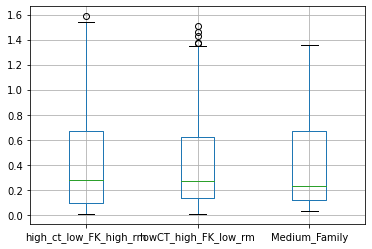

In [ ]:
rel_df.boxplot()
plt.title('Box plot of differences ')

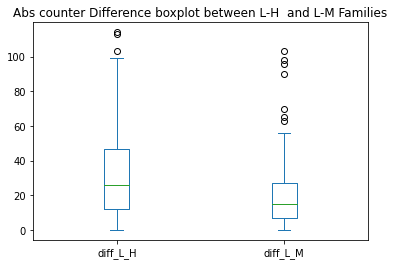

In [ ]:
df[['diff_L_H','diff_L_M' ]].plot.box()
plt.title('Abs counter Difference boxplot between L-H  and L-M Families')
plt.show()

In [ ]:
#cOMPARE CHOICES BETWEEN DIFFERENT FAMILIES (LOW CT, LOW FAKE)

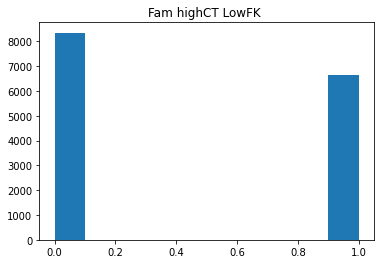

In [ ]:
plt.hist(l_t_f)
plt.title('Fam highCT LowFK ')
plt.show()

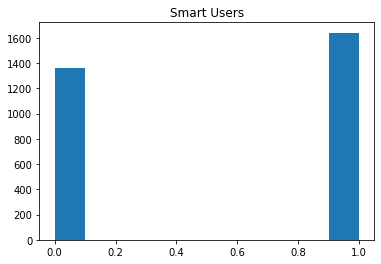

In [ ]:
plt.hist(l_t_f)
plt.title('Smart Users')
plt.show()

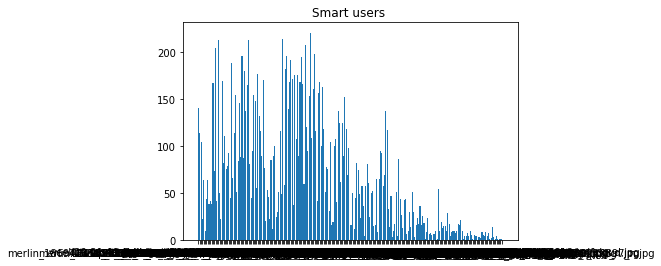

[('stargrazing-landscape2.jpg', 221),
 ('moon.jpg', 214),
 ('A6ZJCLdCcAAG_JL.jpg', 213),
 ('239610593_1008574129906192_7252195101112575889_n.jpg', 213),
 ('photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg', 208),
 ('half_pint.jpg', 205),
 ('clouds.jpg', 198),
 ('Eimmart_1600.jpg', 196),
 ('hurricane.jpg', 196),
 ('Cattura_tsunami.PNG', 195),
 ('planet plus moon fake.jpg', 192),
 ('divht0vvwaaciht.jpg', 189),
 ('week20-21-01.jpg-nggid0524324-ngg0dyn-900x600x100-00f0w010c010r110f110r010t010.jpg',
  182),
 ('247348601_406037877741322_5824403892907435258_n.jpg', 180),
 ('mars_rocks.PNG', 177),
 ('veenzia_F_LC_HM.jpg', 176),
 ('tsunami faro.PNG', 176),
 ('professional_ph.PNG', 172),
 ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 171),
 ('Scuba.jpg', 170)]

In [ ]:
#gullible users choosen image
bb = l_img
q = Counter(l_img)
plt.bar(q.keys(), q.values())
plt.title('Smart users ')
plt.show()

q.most_common(20)

In [ ]:
print(qqq) #= sorted(q.items())

lowct = sorted(q.items())
print(lowct)

[('06PUTIN2-superJumbo.jpg', 16), ('07Irma-1-superJumbo.jpg', 45), ('08florence-web1-superJumbo.jpg', 51), ('0rai10kx36741.jpg', 3), ('1000x-1.jpg', 98), ('1024.GIJoe3.mh.121312.jpg', 12), ('10cosmicwall-mw-superJumbo-v3.jpg', 41), ('129213661_727344641494941_4848570748359335589_n.jpg', 10), ('13-Worst-Photoshop-Fails.jpg', 6), ('140997096_417355959474008_5195845559446524956_n.jpg', 16), ('149701main_06pd0972.jpg', 118), ('1508448872148567050.jpg', 10), ('155811829_268435034848627_7795769256476447589_n.jpg', 66), ('1600x900_1574596844575.WhatsApp_Image_2019_11_24_at_10.36.16.jpeg', 171), ('1614946972_untitled-design-2021-03-05t175145.226.jpg', 33), ('182296921_488481815805774_8663055323760631732_n.jpg', 17), ('190116015911-vladimir-putin-smiles-072018.jpg', 19), ('225029973_3070110136544933_7909752207912876690_n.jpg', 108), ('225250510_620087758972367_9168951633142805579_n.jpg', 17), ('22wordplay-milky-way-facebookJumbo.jpg', 62), ('239610593_1008574129906192_7252195101112575889_n.jpg'

In [ ]:
# print(set([ i[0].lower() for i in list(q.most_common(50))]))
# print(set([ i[0].lower() for i in list(w.most_common(50))]))
#print(set([ i[0].lower() for i in list(w.most_common(20))]) - set([ i[0].lower() for i in list(q.most_common(20))]))

res = list(set([ i[0].lower() for i in list(q.most_common(100))])^set([ i[0].lower() for i in list(w.most_common(100))]))
print(len(res))

NameError: ignored

In [ ]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [ ]:
counter_cosine_similarity(qqq, lowct)

AttributeError: ignored

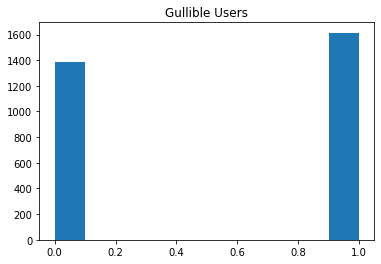

In [ ]:
plt.hist(l_t_f)
plt.title('Gullible Users')
plt.show()

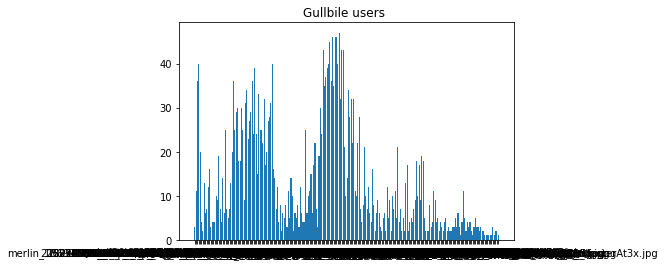

[('photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg', 47),
 ('tsunami faro.PNG', 46),
 ('new_york_city_underwater_1050x700.jpg', 46),
 ('Cattura_tsunami.PNG', 46),
 ('veenzia_F_LC_HM.jpg', 45),
 ('week20-21-01.jpg-nggid0524324-ngg0dyn-900x600x100-00f0w010c010r110f110r010t010.jpg',
  43),
 ('istockphoto-924104794-612x612.jpg', 43),
 ('stargrazing-landscape2.jpg', 43),
 ('moon.jpg', 40),
 ('aapotere1.PNG', 40),
 ('planet plus moon fake.jpg', 40),
 ('volcano.jpg', 40),
 ('A6ZJCLdCcAAG_JL.jpg', 39),
 ('merlin_190627818_41f0a3e1-8f27-41b2-a040-26d54c996e9b-superJumbo.jpg', 39),
 ('Fossil-Fuels-1.jpg', 37),
 ('75214698_163803448162335_423691969536250799_n.jpg', 36),
 ('clouds.jpg', 36),
 ('half_pint.jpg', 36),
 ('london-has-fa.jpg', 36),
 ('hurricane.jpg', 35)]

In [ ]:
#gullible users choosen image
aa = l_img
w = Counter(l_img)
plt.bar(w.keys(), w.values())
plt.title('Gullbile users ')
plt.show()

w.most_common(20)

In [ ]:
w = Counter(l_img)
plt.bar(w.keys(), w.values())
plt.title('Gullbile users ')

In [ ]:
[*dict_user[0]]

['topic', 'fake', 'virality', 'credibility_user', 'rm', 'crit_think', 'kt']

# Save All aswners

In [ ]:
#torch.save(ALL_ANSWER, '/content/drive/MyDrive/Simulazione Marco Siino/test_ALL_ANSWER.pt')
torch.save(ALL_ANSWER, '/content/drive/MyDrive/Simulazione Marco Siino/3kUser_No_embedding.pt')

In [ ]:
#loadallansw = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/test_ALL_ANSWER.pt')
#loadallansw = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/ANSW_VIR_FAKE_TOPIC.pt')
loadallansw = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/10kUser_No_embedding.pt')
loadallansw = torch.load('/content/drive/MyDrive/Simulazione Marco Siino/3kUser_No_embedding.pt')

In [ ]:
loadallansw = ALL_ANSWER

In [ ]:
user_example = dict(zip(range(30), loadallansw[42]))
user_example

{0: ['Ham_the_chimp_(cropped).jpg', array([0.08320783]), array([0.07489112])],
 1: ['flatearthconvention-notext.png',
  array([0.01760304]),
  array([0.86276458])],
 2: ['planet_crush.jpg', array([0.09763464]), array([0.05012307])],
 3: ['10cosmicwall-mw-superJumbo-v3.jpg',
  array([0.94408624]),
  array([0.83431782])],
 4: ['s2ekbnuyehqsghltx1it.jpg', array([0.07423847]), array([0.92732421])],
 5: ['Lunar_base_made_with_3D_printing_pillars.jpg',
  array([0.1275172]),
  array([0.8520611])],
 6: ['ezgif-frame-040.jpg', array([0.14657102]), array([0.89068103])],
 7: ['30SCI-BLACKHOLES1-videoSixteenByNineJumbo1600-v3.jpg',
  array([0.800225]),
  array([0.86604786])],
 8: ['shutterstock-589627616.jpg', array([0.08126385]), array([0.85993011])],
 9: ['planet plus moon fake.jpg', array([0.73960223]), array([0.96796932])],
 10: ['professional_ph.PNG', array([0.94566548]), array([0.82390309])],
 11: ['fake monn lake.jpg', array([0.24493819]), array([0.92899531])],
 12: ['DIGITAL.jpg', array([0

In [ ]:
#example from user 42
user_example = dict(zip(range(30), loadallansw[42]))
user_example

{0: ['giant_ship.jpg', array([0.01058348]), 0.5],
 1: ['car.jpg', array([0.45653026]), 0.5],
 2: ['75214698_163803448162335_423691969536250799_n.jpg',
  array([0.63756536]),
  0.5],
 3: ['moon.jpg', array([0.22146348]), 0.5],
 4: ['225029973_3070110136544933_7909752207912876690_n.jpg',
  array([0.80028417]),
  0.5],
 5: ['week20-21-01.jpg-nggid0524324-ngg0dyn-900x600x100-00f0w010c010r110f110r010t010.jpg',
  array([0.43866876]),
  0.5],
 6: ['hurricane.jpg', array([0.60517722]), 0.5],
 7: ['giant_moon.jpg', array([0.41418462]), 0.5],
 8: ['merlin_190627818_41f0a3e1-8f27-41b2-a040-26d54c996e9b-superJumbo.jpg',
  array([0.68699386]),
  0.5],
 9: ['planet plus moon fake.jpg', array([0.65784797]), 0.5],
 10: ['225250510_620087758972367_9168951633142805579_n.jpg',
  array([0.49465962]),
  0.5],
 11: ['baby-trump1.jpg', array([0.68042094]), 0.5],
 12: ['veenzia_F_LC_HM.jpg', array([0.69147894]), 0.5],
 13: ['london-has-fa.jpg', array([0.66600258]), array([0.35854583])],
 14: ['tsunami faro.PN

## Explore Anwer

[('stargrazing-landscape2.jpg', 214), ('photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg', 208), ('moon.jpg', 201), ('tsunami faro.PNG', 197), ('aapotere1.PNG', 196)]


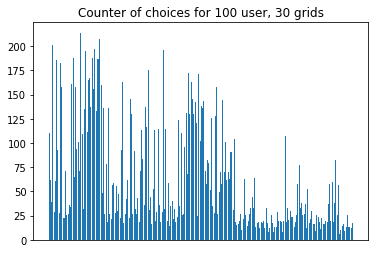

In [ ]:
######     HIGH FAKE LOW CT

#Inspect the frequenc of choices. 
limg = []
for i in loadallansw:
  #print(i)
  imgs = [j[0] for j in loadallansw[i]]
  limg.append(imgs)
flat_list = [item for sublist in limg for item in sublist]

count = Counter(flat_list)
print(count.most_common(5))

plt.bar(count.keys(), count.values())
#plt.xticks(rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Counter of choices for 100 user, 30 grids')

plt.show()

[('stargrazing-landscape2.jpg', 1262), ('moon.jpg', 1210), ('clouds.jpg', 1182), ('A6ZJCLdCcAAG_JL.jpg', 1169), ('photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg', 1166)]


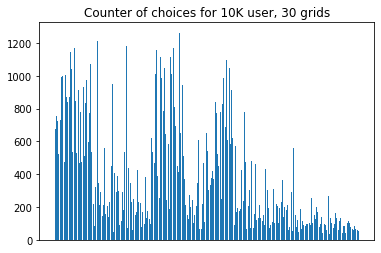

In [ ]:
# LOW FKE HIGH CT

#Inspect the frequenc of choices. 
limg = []
for i in loadallansw:
  #print(i)
  imgs = [j[0] for j in loadallansw[i]]
  limg.append(imgs)
flat_list = [item for sublist in limg for item in sublist]

count = Counter(flat_list)
print(count.most_common(5))

plt.bar(count.keys(), count.values())
#plt.xticks(rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Counter of choices for 10K user, 30 grids')

plt.show()
#Inspect the frequenc of choices. 
limg = []
for i in loadallansw:
  #print(i)
  imgs = [j[0] for j in loadallansw[i]]
  limg.append(imgs)
flat_list = [item for sublist in limg for item in sublist]

count = Counter(flat_list)
print(count.most_common(5))

plt.bar(count.keys(), count.values())
#plt.xticks(rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Counter of choices for 10K user, 30 grids')

plt.show()

[('stargrazing-landscape2.jpg', 41), ('photo-contest-week-29-2021-Peter-Kovesi-microburst.jpg', 39), ('clouds.jpg', 39), ('moon.jpg', 39), ('Cattura_tsunami.PNG', 38)]


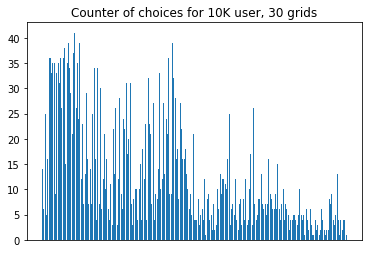

In [ ]:
#Inspect the frequenc of choices. 
limg = []
for i in loadallansw:
  #print(i)
  imgs = [j[0] for j in loadallansw[i]]
  limg.append(imgs)
flat_list = [item for sublist in limg for item in sublist]

count = Counter(flat_list)
print(count.most_common(5))

plt.bar(count.keys(), count.values())
#plt.xticks(rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Counter of choices for 10K user, 30 grids')

plt.show()

In [ ]:
#Inspect the labe distribution of chosen imgs 
# lnimg = []
# for i in loadallansw:
#   #print(i)
#   name_imgs = [j[0] for j in loadallansw[i]]
#   lnimg.append(name_imgs)
# flat_list = [item for sublist in lnimg for item in sublist]
# lnimg = df_imgs.loc[flat_list]

# plt.boxplot(flat_list)
# plt.title('Boxplot prob image chosen is TRUE')
# plt.show()

# plt.hist(flat_list)
# plt.title('Boxplot prob image chosen is TRUE')
# plt.show()

Text(0.5, 1.0, 'Histogram of probability that an image is credible coloured by credibility label')

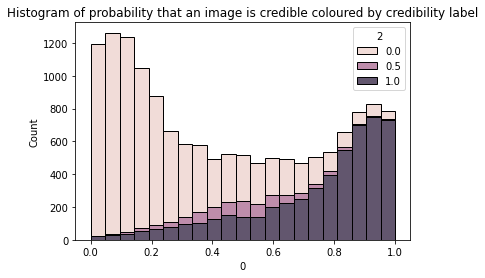

In [ ]:
#Inspect the probabiity that an image is true 
limg = []
l_names = []
l_tf = []
for i in loadallansw:
  #print(i)
  names = [j[0] for j in loadallansw[i]]
  imgs = [float(j[1]) for j in loadallansw[i]]
  t_f = df_imgs.loc[names]['cred'].values
  limg.append(imgs)
  l_names.append(names)
  l_tf.append(t_f)
flat_list = [item for sublist in limg for item in sublist]
flat_list_names = [item for sublist in l_names for item in sublist]
flat_list_tf = [item for sublist in l_tf for item in sublist]


tt = pd.DataFrame(data=[flat_list,flat_list_names,flat_list_tf]).T

sns.histplot(data=tt, x=0, hue=2, multiple="stack").set_title('Histogram of probability that an image is credible coloured by credibility label')

#plt.boxplot(flat_list)
# plt.title('Boxplot prob image chosen is TRUE')
# plt.show()



# plt.hist(flat_list)
# plt.title('Boxplot prob image chosen is TRUE')
# plt.show()

Text(0.5, 1.0, 'Histogram of probability that an image is manipulated coloured by manipulation label')

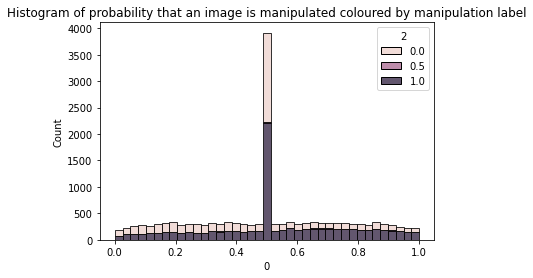

In [ ]:
#Inspect the probabiity that an image is manipulated 
# limg = []
# for i in loadallansw:
#   #print(i)
#   imgs = [float(j[2]) for j in loadallansw[i]]
#   limg.append(imgs)
# flat_list = [item for sublist in limg for item in sublist]

# plt.hist(flat_list)
# plt.title('Hist prob image chosen is manipulated')
# plt.show()

# plt.boxplot(flat_list)
# plt.title('Boxplot prob image chosen is manipulated')
# plt.show()


#Inspect the probabiity that an image is maniulated
limg = []
l_names = []
l_manip = []
for i in loadallansw:
  #print(i)
  names = [j[0] for j in loadallansw[i]]
  imgs = [float(j[2]) for j in loadallansw[i]]
  manip = df_imgs.loc[names]['manip'].values
  limg.append(imgs)
  l_names.append(names)
  l_manip.append(manip)
flat_list = [item for sublist in limg for item in sublist]
flat_list_names = [item for sublist in l_names for item in sublist]
flat_list_manip = [item for sublist in l_manip for item in sublist]


tt = pd.DataFrame(data=[flat_list,flat_list_names,flat_list_manip]).T


sns.histplot(data=tt, x=0, hue=2, multiple="stack").set_title('Histogram of probability that an image is manipulated coloured by manipulation label')

# TensorFlow Dataset

In [ ]:
start = time.time()

num_user, num_grid , num_imgs, num_features_x =  500, 30, 8, 7
#num_features_y = 7  #topic pref + critthink    + pref_vir + pref_fake
num_features_y = 12  #topic pref + critthink    + pref_vir + pref_fake + kt_topic

x = np.zeros(shape=[num_user, num_grid , num_imgs, num_features_x])
#y = np.zeros(shape=[num_user,num_grid, 1, num_features_y])
y = np.zeros(shape=[num_user, num_features_y])
y_grid = np.zeros(shape=[num_user, num_grid , 2])

for user in range(num_user):
  user_crit_think = dict_user[user]['crit_think']
  TOPIC_PREF      = dict_user[user]['topic']
  VIR_PREF        = dict_user[user]['virality']
  FAKE_PREF       = dict_user[user]['fake']
  KT              = dict_user[user]['kt']
  RM              = dict_user[user]['rm']  
  y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF, KT, [RM] ))
  y[user, : ] = y_answers
  for grid in range(num_grid):
    grids_imgs = [i.split('/')[1] for i in grids[grid]]
    imgs_feat = df_imgs.loc[grids_imgs].drop(['folder', 'url'], axis = 1).values
    for image in range(num_imgs):
      choosen, prob_vera, prob_manip  = loadallansw[user][grid][0], loadallansw[user][grid][1], loadallansw[user][grid][2]
      #print(choosen, prob_vera, prob_manip)
      choosen_arr = np.array([1 if i== choosen else 0 for i in grids_imgs]).reshape(8,1)
      
      #print(imgs_feat)
      #embedding = np.array([imgs_emb[i].numpy().reshape(1000) for i in grids_imgs])
      #imgs  = np.append(imgs_feat, embedding, axis=1)
      #print(imgs.shape)
      imgs  = np.append(imgs_feat, choosen_arr, axis=1)   
      #print(imgs.shape)
      #print()
      #y_answers = np.concatenate(([user_crit_think],[prob_vera],[prob_manip],TOPIC_PREF, [VIR_PREF] ))
      #y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF ))
      x[user, grid, : , :]   = imgs
      y_grid[user, grid, : ] =  prob_vera, prob_manip
      #y[user, : , :] = y_answers

print('tot time',time.time()- start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


tot time 22.337538242340088


In [ ]:
print(x.shape)
print(y.shape)
print(y_grid.shape)

(500, 30, 8, 7)
(500, 12)
(500, 30, 2)


In [ ]:
y[0, : ]

array([ 0.19235226,  0.37056617,  0.70497567,  0.13424948, -0.49690051,
       -0.99871624,  0.96643099,  0.14855197,  0.15514435,  0.04047341,
        0.15663121,  0.19344669])

In [ ]:
imgs_feat

array([[1.  , 1.  , 0.  , 0.  , 2.63, 0.  ],
       [0.  , 1.  , 1.  , 1.  , 3.93, 1.  ],
       [2.  , 1.  , 0.  , 1.  , 4.99, 1.  ],
       [1.  , 0.  , 1.  , 0.  , 3.7 , 0.  ],
       [3.  , 1.  , 1.  , 0.  , 7.03, 1.  ],
       [3.  , 0.  , 0.  , 1.  , 3.74, 0.  ],
       [2.  , 0.  , 0.5 , 0.  , 2.95, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 3.73, 0.  ]])

In [ ]:
# start = time.time()

# num_user, num_grid , num_imgs, num_features_x =  100, 30, 8, 1007
# num_features_y =  6 #critthink +  prob_vera   + prob_manip
# x = np.zeros(shape=[num_user, num_grid , num_imgs, num_features_x])
# y = np.zeros(shape=[num_user, num_features_y ])

# for user in range(num_user):
#   user_crit_think = dict_user[user]['crit_think']
#   TOPIC_PREF      = dict_user[user]['topic']
#   VIR_PREF        = dict_user[user]['virality']  
#   for grid in range(num_grid):
#     grids_imgs = [i.split('/')[1] for i in grids[grid]]

#     for image in range(num_imgs):
#       choosen, prob_vera, prob_manip  = loadallansw[user][grid][0], loadallansw[user][grid][1], loadallansw[user][grid][2]
#       #print(choosen, prob_vera, prob_manip)
#       choosen_arr = np.array([1 if i== choosen else 0 for i in grids_imgs]).reshape(8,1)

#       imgs_feat = df_imgs.loc[grids_imgs].drop(['folder', 'url'], axis = 1).values
#       #print(imgs_feat)
#       embedding = np.array([imgs_emb[i].numpy().reshape(1000) for i in grids_imgs])
#       imgs  = np.append(imgs_feat, embedding, axis=1)
#       #print(imgs.shape)
#       imgs  = np.append(imgs, choosen_arr, axis=1)   
#       #print(imgs.shape)
#       #print()
#       y_answers = np.concatenate(([user_crit_think],TOPIC_PREF, [VIR_PREF] ))
#       x[user, grid, : , :] = imgs
#       #y[user, grid, : , :] = user_crit_think , prob_vera, prob_manip
#       y[user , :] = y_answers

# print('tot time',time.time()- start)

tot time 26.632232189178467


In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/Multioutput_Dataset')

In [ ]:
for i in train_dataset:
  print(type(i), len(i))
  print(i[0].shape,i[1].shape,i[2].shape)
  break  

<class 'tuple'> 3
(30, 8, 7) (7,) (30, 2)


In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/Multioutput_Dataset')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/LW_CriTh_HG_FAKE_Dataset')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/HG_CriTh_LW_FAKE_Dataset')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/3k_Users_11_Features')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/3k_Users_12_Features')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/500_gullible_users')

# train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
# tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/500_SMART_users')

train_dataset = tf.data.Dataset.from_tensor_slices((x, y, y_grid))
tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/500_Mixed_Users')

## Use numpy

In [ ]:
np.save('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/x_updated.npy', x)
np.save('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/y_updated_VIR_FAKE.npy', y)

In [ ]:
#xload = np.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/x_prova.npy')
#yload = np.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/y_prova.npy')


xload = np.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/x_updated.npy')
yload = np.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/y_updated_VIR_FAKE.npy')

In [ ]:
#import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((xload, yload))

## Use TensorFlow

In [ ]:
tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/UPDATED_tensorflow_dataset')

In [ ]:
#PATH_DATASET = '/content/drive/MyDrive/tensorflow_dataset'
PATH_DATASET = '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/UPDATED_tensorflow_dataset'

ds = tf.data.experimental.load(PATH_DATASET)

#print original dataset shapes
# for el in ds:
#   print(el[0].shape)
#   print(el[1].shape)

lxtr = []
lytr = []

lxte = []
lyte = []

for idx, el in enumerate(ds):
 if idx < 80:
  tempx = el[0].numpy().flatten().reshape(241680)
  tempy = el[1].numpy().flatten()
  lxtr.append(tempx)
  lytr.append(tempy)
 else: 
  tempx = el[0].numpy().flatten().reshape(241680)
  tempy = el[1].numpy().flatten()
  lxte.append(tempx)
  lyte.append(tempy)

#lx = np.array(lx)
#ly = np.array(ly)
#print(len(lx), '\nlx.shape',lx.shape, '\nly.shape',ly.shape)
#print(len(lx), lx[0].shape, ly[0].shape)

In [ ]:
new_dataset = tf.data.experimental.load('/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/tensorflow_dataset')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Simulazione Marco Siino/location_all_images.csv', index_col=0, dtype={'0':str})

In [ ]:
df.head()

,0
Black_lion.jpg,/content/drive/MyDrive/Dataset_Images_Francesc...
college.jpg,/content/drive/MyDrive/Dataset_Images_Francesc...
iceberg.jpg,/content/drive/MyDrive/Dataset_Images_Francesc...
lanterns.jpg,/content/drive/MyDrive/Dataset_Images_Francesc...
Paris_shirt.jpg,/content/drive/MyDrive/Dataset_Images_Francesc...


In [ ]:
df.loc['Black_lion.jpg'][0]

'/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/images/commons/commons_F_HC_HM/Black_lion.jpg'

# generate 10k users and simulate choices and write answers

In [ ]:
num_user = 1000
dict_user = create_users(num_user, 4)

In [ ]:
start = time.time()
ALL_ANSWER = {}
for user in range(len([*dict_user])): 
  ALL_ANSWER[user] = []
  user_pref =  dict_user[user]
  user_personalized_grids = grids
  for grid in range(30):
    img_names = user_personalized_grids[grid]
    img_names = [i.split('/')[-1] for i in img_names]
    IMG_FEAT_DICT = df_imgs.loc[img_names].T.to_dict()
    #print('img_names', img_names)
    grid_scores , grid_asnwer = V2_generate_Rank(img_names , IMG_FEAT_DICT, imgs_emb,dict_user,user,lower=0, upper=1, mysigma=0.2, plot=False)
    choosen_img = max(grid_scores, key=grid_scores.get)
    #print('user, choosen_img\n', user, choosen_img)
    answer_tru, answer_manip = grid_asnwer[choosen_img]
    answer_tru = answer_tru[0]  #it was an array now is a float
    ALL_ANSWER[user].append([choosen_img, answer_tru, answer_manip])
  print('grid ', grid)
print('tot time',time.time()- start)

grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
grid  29
g

In [ ]:
loadallansw = ALL_ANSWER

'Cat34535tura.PNG'

In [ ]:
start = time.time()


loadallansw = ALL_ANSWER

num_user, num_grid , num_imgs, num_features_x =  1000, 30, 8, 7
num_features_y = 7 + 2 *num_grid#topic pref + critthink    + pref_vir + pref_fake

x = np.zeros(shape=[num_user, num_grid , num_imgs, num_features_x])
y = np.zeros(shape=[num_user, num_features_y])


feat_grids_dict = {}
for grid in range(num_grid):
  grids_imgs = [i.split('/')[1] for i in grids[grid]]
  imgs_feat = df_imgs.loc[grids_imgs].drop(['folder', 'url'], axis = 1).values
  feat_grids_dict[grid] = imgs_feat

for user in range(num_user):
  user_crit_think = dict_user[user]['crit_think']
  TOPIC_PREF      = dict_user[user]['topic']
  VIR_PREF        = dict_user[user]['virality']
  FAKE_PREF        = dict_user[user]['fake']  
  y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF ))
  y[user, : ] = y_answers
  for grid in range(num_grid):
    imgs_feat = feat_grids_dict[grid]
    grids_imgs = [i.split('/')[1] for i in grids[grid]] 
    for image in range(num_imgs):
      choosen, prob_vera, prob_manip  = loadallansw[user][grid][0], loadallansw[user][grid][1], loadallansw[user][grid][2]
      #print(choosen, prob_vera, prob_manip)
      choosen_arr = np.array([1 if i == choosen else 0 for i in grids_imgs]).reshape(8,1)
      
      #print(choosen_arr)
      
      #embedding = np.array([imgs_emb[i].numpy().reshape(1000) for i in grids_imgs])
      #imgs  = np.append(imgs_feat, embedding, axis=1)
      #print(imgs.shape)
      imgs  = np.append(imgs_feat, choosen_arr, axis=1)   
      #print(imgs.shape)
      #print()
      #y_answers = np.concatenate(([user_crit_think],[prob_vera],[prob_manip],TOPIC_PREF, [VIR_PREF] ))
      #y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF ))
      x[user, grid, : , :] = imgs
      y[user, grid, : , :] = user_crit_think , prob_vera, prob_manip
      #y[user, : , :] = y_answers

print('tot time',time.time()- start)

tot time 3.4107329845428467


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
tf.data.experimental.save(train_dataset, '/content/drive/MyDrive/Dataset_Images_Francesco_Politics_Space/1k_User')

In [ ]:
start = time.time()


loadallansw = ALL_ANSWER

num_user, num_grid , num_imgs, num_features_x =  1000, 30, 8, 7
num_features_y = 7 + 2 *num_grid#topic pref + critthink    + pref_vir + pref_fake

x = np.zeros(shape=[num_user, num_grid , num_imgs, num_features_x])
y = np.zeros(shape=[num_user, num_features_y])


feat_grids_dict = {}
for grid in range(num_grid):
  grids_imgs = [i.split('/')[1] for i in grids[grid]]
  imgs_feat = df_imgs.loc[grids_imgs].drop(['folder', 'url'], axis = 1).values
  feat_grids_dict[grid] = imgs_feat

for user in range(num_user):
  user_crit_think = dict_user[user]['crit_think']
  TOPIC_PREF      = dict_user[user]['topic']
  VIR_PREF        = dict_user[user]['virality']
  FAKE_PREF        = dict_user[user]['fake']  
  y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF ))
  y[user, : ] = y_answers
  for grid in range(num_grid):
    imgs_feat = feat_grids_dict[grid]
    grids_imgs = [i.split('/')[1] for i in grids[grid]] 
    for image in range(num_imgs):
      choosen, prob_vera, prob_manip  = loadallansw[user][grid][0], loadallansw[user][grid][1], loadallansw[user][grid][2]
      #print(choosen, prob_vera, prob_manip)
      choosen_arr = np.array([1 if i == choosen else 0 for i in grids_imgs]).reshape(8,1)
      
      #print(choosen_arr)
      
      #embedding = np.array([imgs_emb[i].numpy().reshape(1000) for i in grids_imgs])
      #imgs  = np.append(imgs_feat, embedding, axis=1)
      #print(imgs.shape)
      imgs  = np.append(imgs_feat, choosen_arr, axis=1)   
      #print(imgs.shape)
      #print()
      #y_answers = np.concatenate(([user_crit_think],[prob_vera],[prob_manip],TOPIC_PREF, [VIR_PREF] ))
      #y_answers = np.concatenate(([user_crit_think], [VIR_PREF], [FAKE_PREF],TOPIC_PREF ))
      x[user, grid, : , :] = imgs
      y[user, grid, : , :] = user_crit_think , prob_vera, prob_manip
      #y[user, : , :] = y_answers

print('tot time',time.time()- start)